In [1]:
import pandas as pd
train_path =r'C:/Users/Administrator/Desktop/沃尔玛项目/train.csv'
train_df = pd.read_csv(train_path)
print("预览核心数据前五行")
print(train_df.head())
print("核心数据信息")
train_df.info()

预览核心数据前五行
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
核心数据信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [2]:
train_df['Date']=pd.to_datetime(train_df['Date'],format='%Y-%m-%d')
print("查看转换后数据信息")
train_df.info()
print("预览前五行信息")
print(train_df.head())


查看转换后数据信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
预览前五行信息
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


In [3]:
negative_sales_df=train_df[train_df['Weekly_Sales']<0]
print(f"侦察报告")
print(f"我们总共发现了{len(negative_sales_df)}条负消费数据")
print(f"显示前10个数据的情况")
print(negative_sales_df.head(10))
print("负消费数据统计摘要")
print(negative_sales_df['Weekly_Sales'].describe())

侦察报告
我们总共发现了1285条负消费数据
显示前10个数据的情况
      Store  Dept       Date  Weekly_Sales  IsHoliday
846       1     6 2012-08-10       -139.65      False
2384      1    18 2012-05-04         -1.27      False
6048      1    47 2010-02-19       -863.00      False
6049      1    47 2010-03-12       -698.00      False
6051      1    47 2010-10-08        -58.00      False
6056      1    47 2011-04-08       -298.00      False
6057      1    47 2011-07-08       -198.00      False
6061      1    47 2011-10-14       -498.00      False
6062      1    47 2011-12-23       -498.00      False
6063      1    47 2012-02-17       -198.00      False
负消费数据统计摘要
count    1285.000000
mean      -68.608218
std       231.664245
min     -4988.940000
25%       -41.000000
50%       -13.200000
75%        -4.940000
max        -0.020000
Name: Weekly_Sales, dtype: float64


In [4]:
print(f"清理前我们有{len(train_df)}条数据")
train_df=train_df[train_df['Weekly_Sales']>=0]
print(f"清理后我们有{len(train_df)}条数据")
print("清理后数据摘要")
print(train_df.describe())

清理前我们有421570条数据
清理后我们有420285条数据
清理后数据摘要
               Store           Dept                           Date  \
count  420285.000000  420285.000000                         420285   
mean       22.195477      44.242771  2011-06-18 07:22:30.395088640   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.787213      30.507197                            NaN   

        Weekly_Sales  
count  420285.000000  
mean    16030.329773  
min         0.000000  
25%      2117.560000  
50%      7659.090000  
75%     20268.380000  
max    693099.360000  
std     22728.500149  


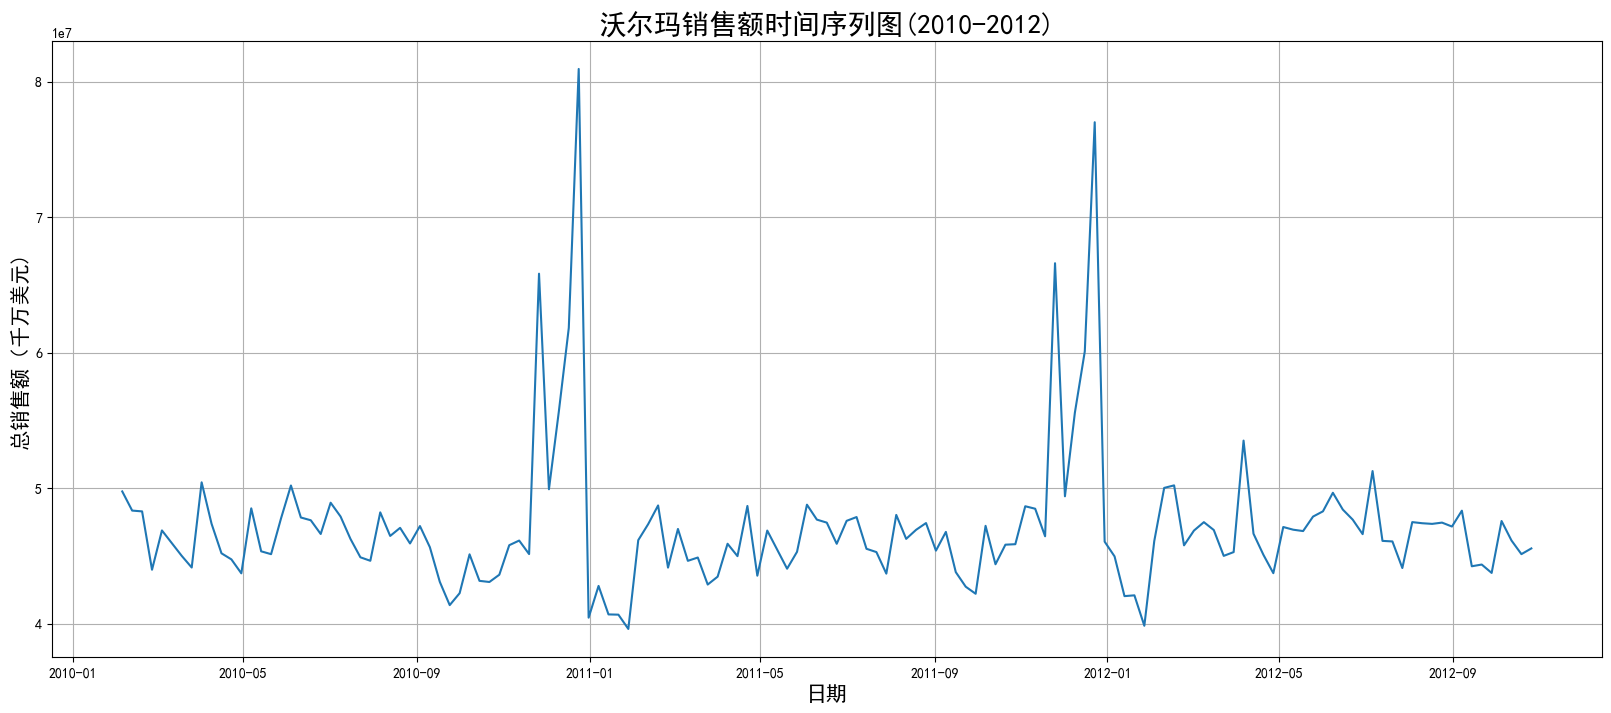

每周总销售额数据预览
        Date  Weekly_Sales
0 2010-02-05   49750875.98
1 2010-02-12   48336800.10
2 2010-02-19   48277902.33
3 2010-02-26   43970440.65
4 2010-03-05   46872715.16


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
weekly_sales_sum=train_df[['Date','Weekly_Sales']].groupby('Date').sum().reset_index()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_sum['Date'],weekly_sales_sum['Weekly_Sales'])
plt.title('沃尔玛销售额时间序列图(2010-2012)',fontsize=20)
plt.xlabel('日期',fontsize=15)
plt.ylabel('总销售额（千万美元)',fontsize=15)
plt.grid(True)
plt.show()
print("每周总销售额数据预览")
print(weekly_sales_sum.head())

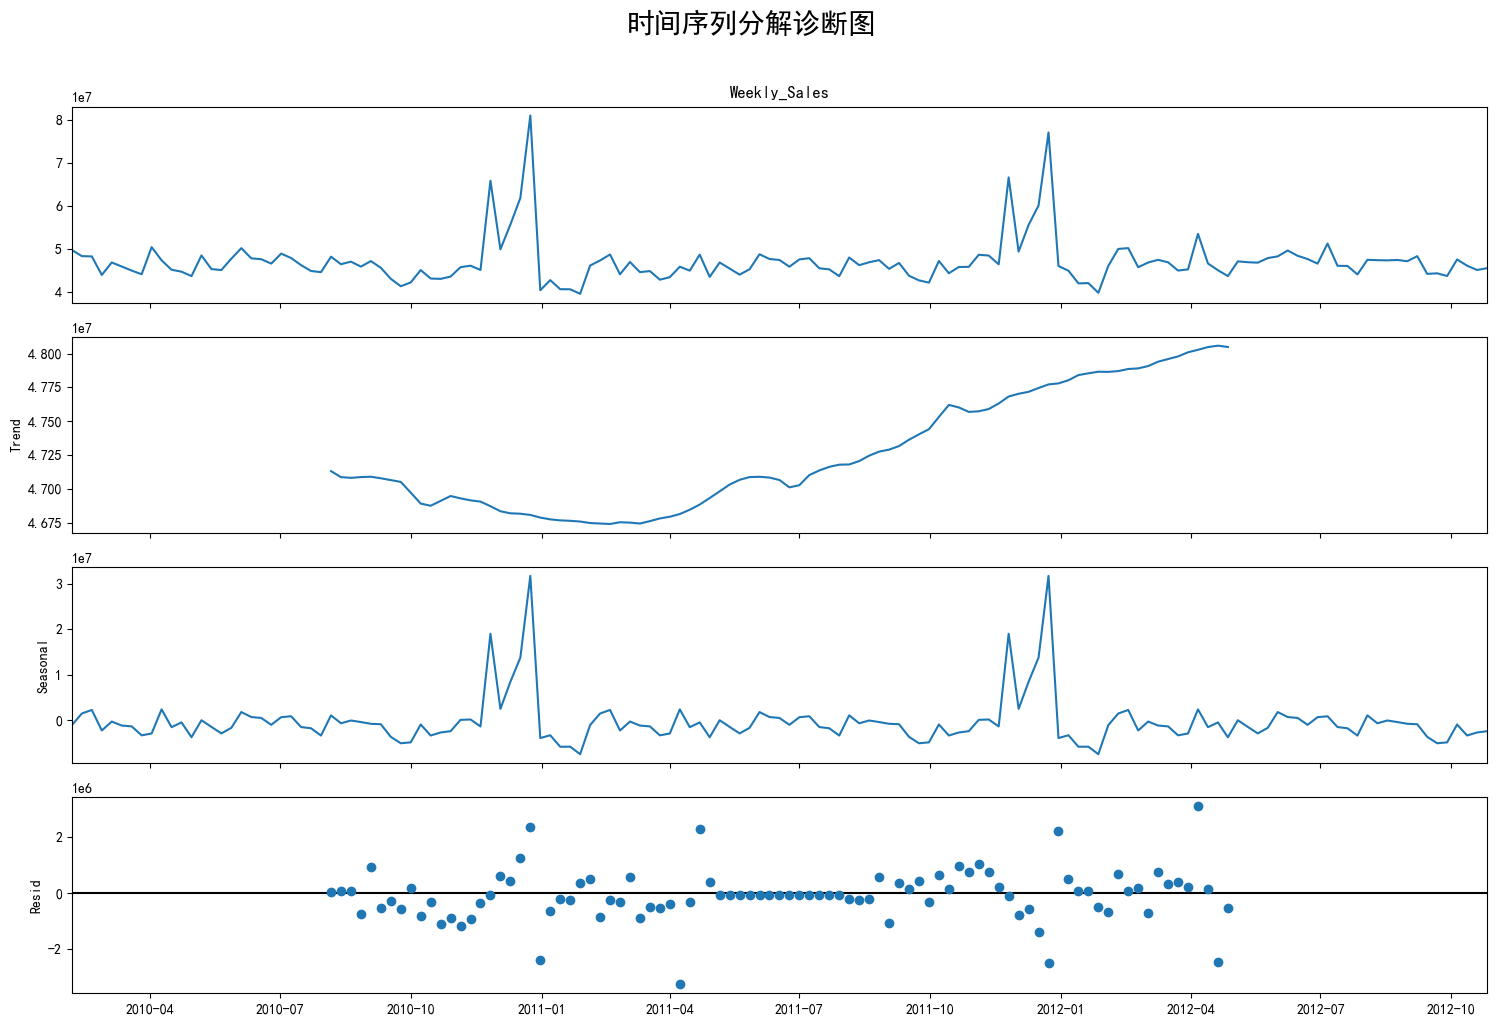

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
time_series_data=weekly_sales_sum.set_index('Date')['Weekly_Sales']
decomposition=seasonal_decompose(time_series_data,model='additive',period=52)
fig=decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle("时间序列分解诊断图",fontsize=20,y=1.02)
plt.tight_layout()
plt.show()

In [7]:
stores_path = 'C:/Users/Administrator/Desktop/沃尔玛项目/stores.csv'
features_path = 'C:/Users/Administrator/Desktop/沃尔玛项目/features.csv'
stores_df = pd.read_csv(stores_path)
features_df = pd.read_csv(features_path)
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%Y-%m-%d')
df_merged = pd.merge(train_df, stores_df, on='Store', how='left')
final_df = pd.merge(df_merged, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
print("最终合并后数据预览")
print(final_df.head())
print("合并数据信息")
final_df.info()

最终合并后数据预览
   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     1 2010-02-12      46039.49       True    A  151315        38.51   
2      1     1 2010-02-19      41595.55      False    A  151315        39.93   
3      1     1 2010-02-26      19403.54      False    A  151315        46.63   
4      1     1 2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170   

In [8]:
markdown_total = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
final_df[markdown_total]=final_df[markdown_total].fillna(0)
print("填充后的数据信息")
final_df.info()
print("填充后数据预览")
print(final_df.head())                  

填充后的数据信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  bool          
 5   Type          420285 non-null  object        
 6   Size          420285 non-null  int64         
 7   Temperature   420285 non-null  float64       
 8   Fuel_Price    420285 non-null  float64       
 9   MarkDown1     420285 non-null  float64       
 10  MarkDown2     420285 non-null  float64       
 11  MarkDown3     420285 non-null  float64       
 12  MarkDown4     420285 non-null  float64       
 13  MarkDown5     420285 non-null  float64       
 14  CPI           420285 non-null  float64       
 15  Unemploy

In [9]:
print("查看Typelie列的分布情况")
print(final_df['Type'].value_counts())

查看Typelie列的分布情况
Type
A    214993
B    162819
C     42473
Name: count, dtype: int64


In [10]:
final_df_encoded=pd.get_dummies(final_df,columns=['Type'],drop_first=True)
print("显示转换后信息")
final_df_encoded.info()
print("转换后的数据预览")
print(final_df_encoded.head())

显示转换后信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  bool          
 5   Size          420285 non-null  int64         
 6   Temperature   420285 non-null  float64       
 7   Fuel_Price    420285 non-null  float64       
 8   MarkDown1     420285 non-null  float64       
 9   MarkDown2     420285 non-null  float64       
 10  MarkDown3     420285 non-null  float64       
 11  MarkDown4     420285 non-null  float64       
 12  MarkDown5     420285 non-null  float64       
 13  CPI           420285 non-null  float64       
 14  Unemployment  420285 non-null  float64       
 15  Type_B   

1号店铺每周总销售额数据预览
Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1612831.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

---正在训练ARIMA模型---

---ARIMA模型诊断摘要---
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1901.473
Date:                Sat, 02 Aug 2025   AIC                           3814.946
Time:                        02:33:10   BIC                           3832.681
Sample:                    02-05-2010   HQIC                          3822.153
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

E:\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
E:\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
E:\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


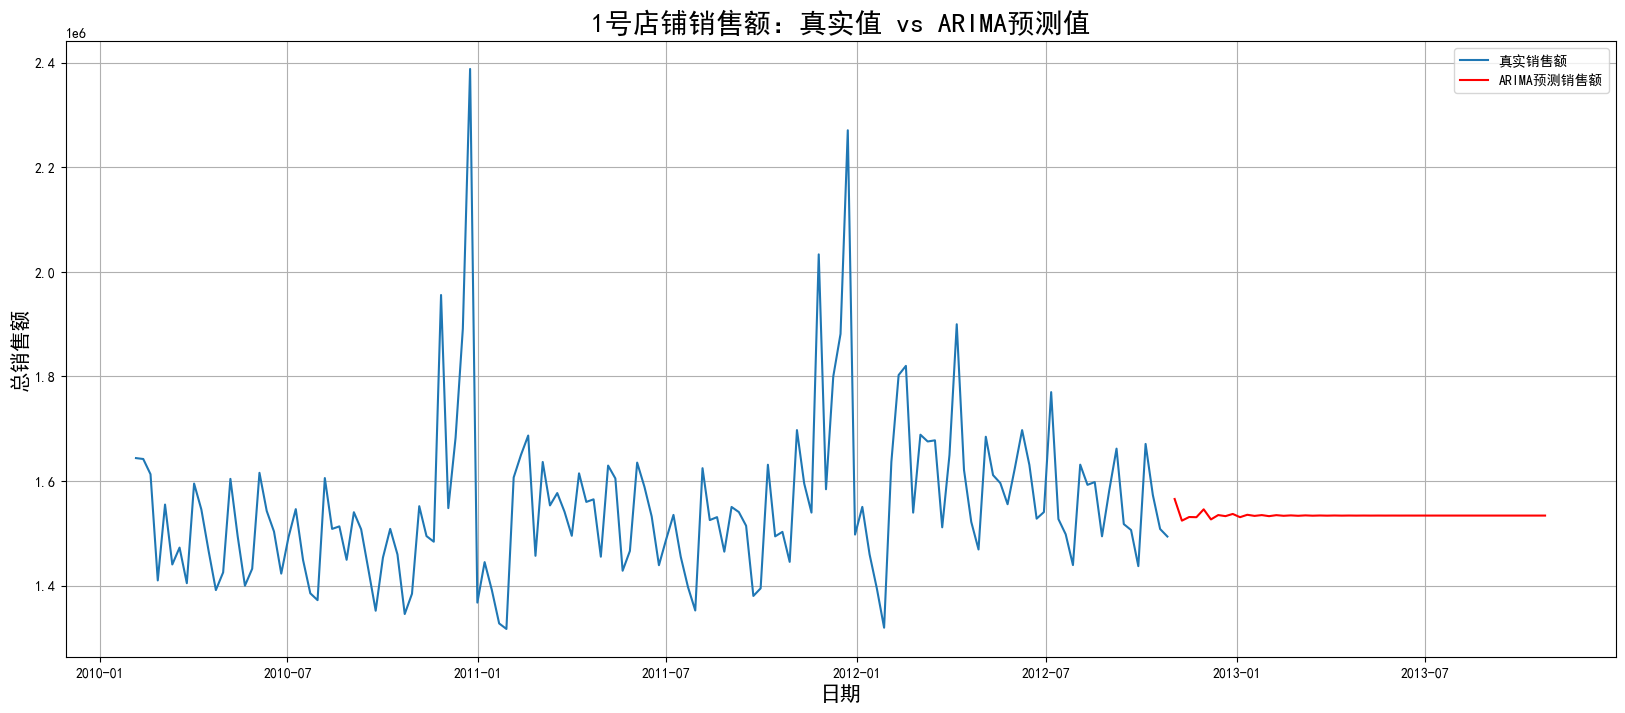



---未来52周的预测值---
2012-11-02    1.565452e+06
2012-11-09    1.524053e+06
2012-11-16    1.530979e+06
2012-11-23    1.530650e+06
2012-11-30    1.545713e+06
2012-12-07    1.526410e+06
2012-12-14    1.534736e+06
2012-12-21    1.532670e+06
2012-12-28    1.536862e+06
2013-01-04    1.530669e+06
2013-01-11    1.535259e+06
2013-01-18    1.533154e+06
2013-01-25    1.534657e+06
2013-02-01    1.532627e+06
2013-02-08    1.534551e+06
2013-02-15    1.533342e+06
2013-02-22    1.534095e+06
2013-03-01    1.533368e+06
2013-03-08    1.534103e+06
2013-03-15    1.533533e+06
2013-03-22    1.533911e+06
2013-03-29    1.533612e+06
2013-04-05    1.533895e+06
2013-04-12    1.533653e+06
2013-04-19    1.533831e+06
2013-04-26    1.533698e+06
2013-05-03    1.533812e+06
2013-05-10    1.533713e+06
2013-05-17    1.533791e+06
2013-05-24    1.533732e+06
2013-05-31    1.533780e+06
2013-06-07    1.533739e+06
2013-06-14    1.533773e+06
2013-06-21    1.533746e+06
2013-06-28    1.533767e+06
2013-07-05    1.533750e+06
2013-07-12

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
store1_df = final_df_encoded[final_df_encoded['Store']==1]
store1_sales=store1_df.groupby('Date')['Weekly_Sales'].sum()
print("1号店铺每周总销售额数据预览")
print(store1_sales.head())
print("\n---正在训练ARIMA模型---")
model= ARIMA(store1_sales,order=(5,1,0))
model_fit=model.fit()
print("\n---ARIMA模型诊断摘要---")
print(model_fit.summary())
forecast = model_fit.forecast(steps=52)
plt.figure(figsize=(20,8))
plt.plot(store1_sales.index,store1_sales.values,label="真实销售额")
plt.plot(forecast.index,forecast.values,label='ARIMA预测销售额',color='red')
plt.title('1号店铺销售额：真实值 vs ARIMA预测值',fontsize=20)
plt.xlabel('日期',fontsize=15)
plt.ylabel('总销售额',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()
print("\n\n---未来52周的预测值---")
print(forecast)
         



---正在训练SARIMAX模型---


E:\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
E:\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)



---SARIMAX模型诊断摘要---
                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1143.918
Date:                            Sat, 02 Aug 2025   AIC                           2301.835
Time:                                    02:33:16   BIC                           2319.334
Sample:                                02-05-2010   HQIC                          2308.892
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1827      0.022     -8.139      0.000      -0.227      -0.139
ar.L2         

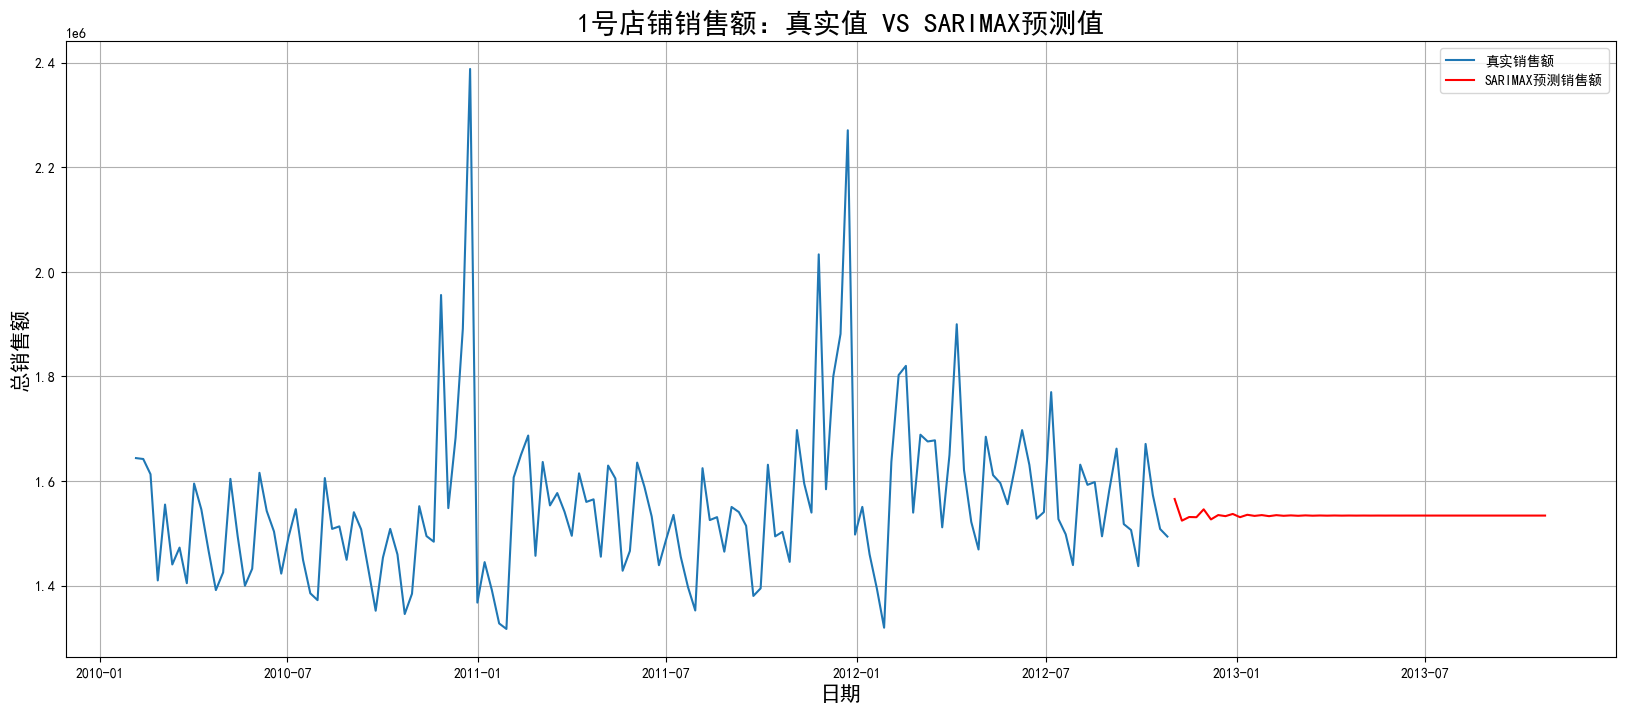

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
store1_sales = final_df_encoded[final_df_encoded['Store']==1].groupby('Date')['Weekly_Sales'].sum()
print("\n---正在训练SARIMAX模型---")
model_sarima = SARIMAX(store1_sales,order=(5,1,0),seasonal_order=(1,1,0,52))
model_sarima_fit = model_sarima.fit(disp=False)
print("\n---SARIMAX模型诊断摘要---")
print(model_sarima_fit.summary())
forecast_sarima = model_fit.forecast(52)
plt.figure(figsize=(20,8))
plt.plot(store1_sales.index,store1_sales.values,label='真实销售额')
plt.plot(forecast_sarima.index,forecast_sarima.values,label='SARIMAX预测销售额',color='red')
plt.title('1号店铺销售额：真实值 VS SARIMAX预测值',fontsize=20)
plt.xlabel('日期',fontsize=15)
plt.ylabel('总销售额',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
store1_sales = final_df_encoded[final_df_encoded['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()
store1_sales.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)
print("---为Prophet准备好的数据预览---")
print(store1_sales.head())

---为Prophet准备好的数据预览---
          ds           y
0 2010-02-05  1643690.90
1 2010-02-12  1641957.44
2 2010-02-19  1612831.17
3 2010-02-26  1409727.59
4 2010-03-05  1554806.68


In [14]:
model_prophet=Prophet(interval_width=0.95)
print("\n---正在训练Prophet模型...---")
model_prophet.fit(store1_sales)
future = model_prophet.make_future_dataframe(periods=52,freq='W')
print("\n---未来时间框架预览---")
print(future.tail())
forecast_prophet=model_prophet.predict(future)

02:33:16 - cmdstanpy - INFO - Chain [1] start processing



---正在训练Prophet模型...---


02:33:17 - cmdstanpy - INFO - Chain [1] done processing



---未来时间框架预览---
            ds
190 2013-09-22
191 2013-09-29
192 2013-10-06
193 2013-10-13
194 2013-10-20



---正在绘制Prophet预测图...---


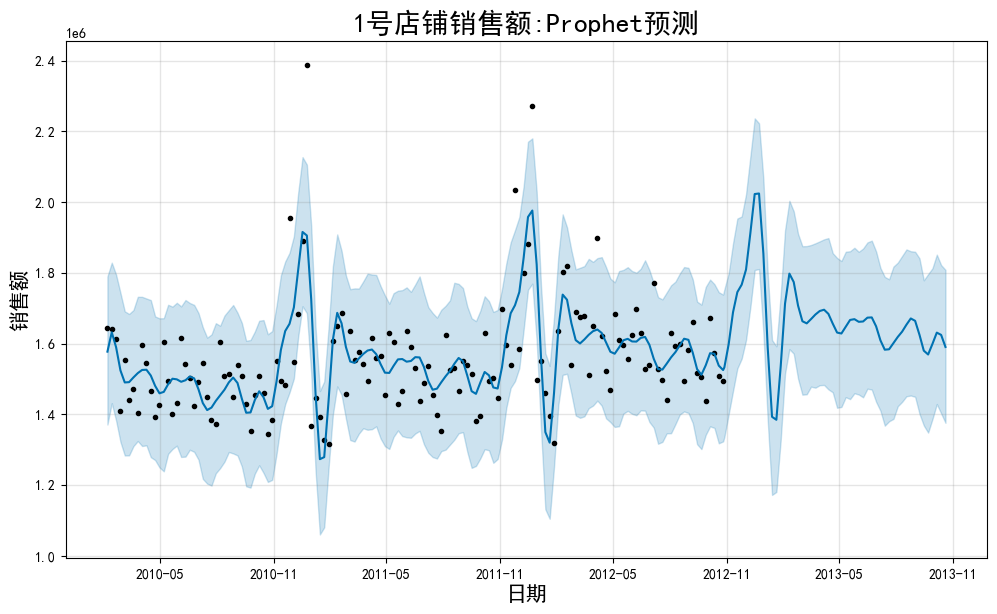

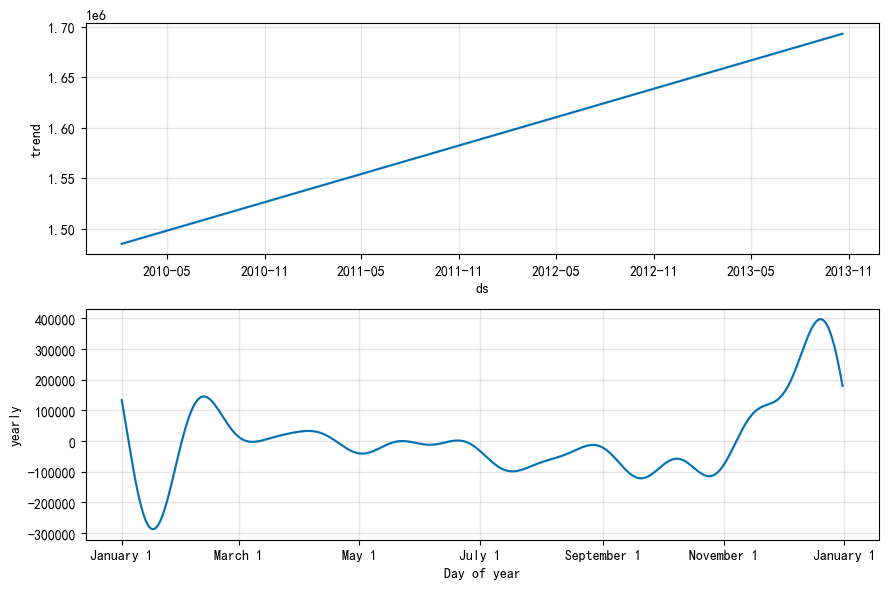


--预测结果详细数据预览--
            ds          yhat    yhat_lower    yhat_upper
0   2010-02-05  1.576999e+06  1.370890e+06  1.789583e+06
1   2010-02-12  1.631643e+06  1.431347e+06  1.828675e+06
2   2010-02-19  1.589550e+06  1.382177e+06  1.794668e+06
3   2010-02-26  1.523944e+06  1.322082e+06  1.743309e+06
4   2010-03-05  1.489916e+06  1.283402e+06  1.691034e+06
..         ...           ...           ...           ...
190 2013-09-22  1.568954e+06  1.348068e+06  1.796116e+06
191 2013-09-29  1.598971e+06  1.386566e+06  1.812914e+06
192 2013-10-06  1.630843e+06  1.428809e+06  1.851379e+06
193 2013-10-13  1.624372e+06  1.402368e+06  1.821755e+06
194 2013-10-20  1.590207e+06  1.375714e+06  1.808364e+06

[195 rows x 4 columns]


In [15]:
forecast_prophet=model_prophet.predict(future)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
print("\n---正在绘制Prophet预测图...---")
fig1=model_prophet.plot(forecast_prophet)
plt.title('1号店铺销售额:Prophet预测',fontsize=20)
plt.xlabel('日期',fontsize=15)
plt.ylabel('销售额',fontsize=15)
plt.show()
fig2=model_prophet.plot_components(forecast_prophet)
plt.show()
print("\n--预测结果详细数据预览--")
print(forecast_prophet[['ds','yhat','yhat_lower','yhat_upper']])


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
y_true = store1_sales['y'].values
sarimax_pred_in_sample = model_sarima_fit.predict(start=store1_sales['ds'].iloc[0], end=store1_sales['ds'].iloc[-1]).values
prophet_pred_in_sample = pd.merge(store1_sales, forecast_prophet[['ds', 'yhat']],on='ds', how='inner')['yhat'].values
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    print(f"--- {model_name} 模型评估分数 ---")
    print(f"RMSE (均方根误差): ${rmse:,.2f}")
    print(f"MAE (平均绝对误差): ${mae:,.2f}")
    print(f"MAPE (平均绝对百分比误差): {mape:.2f}%")
    print("-" * 30)
print("\n--- 模型在训练集上的表现对比 ---")
calculate_metrics(y_true[53:], sarimax_pred_in_sample[53:], "SARIMAX")
calculate_metrics(y_true, prophet_pred_in_sample, "Prophet")


--- 模型在训练集上的表现对比 ---
--- SARIMAX 模型评估分数 ---
RMSE (均方根误差): $78,057.87
MAE (平均绝对误差): $59,322.49
MAPE (平均绝对百分比误差): 3.73%
------------------------------
--- Prophet 模型评估分数 ---
RMSE (均方根误差): $106,890.58
MAE (平均绝对误差): $76,098.11
MAPE (平均绝对百分比误差): 4.80%
------------------------------


03:21:40 - cmdstanpy - INFO - Chain [1] start processing


--- 我们为Prophet创建的“节假日日历” ---
        holiday         ds
0     SuperBowl 2010-02-12
1     SuperBowl 2011-02-11
2     SuperBowl 2012-02-10
3      LaborDay 2010-09-10
4      LaborDay 2011-09-09
5      LaborDay 2012-09-07
6  Thanksgiving 2010-11-26
7  Thanksgiving 2011-11-25
8     Christmas 2010-12-31
9     Christmas 2011-12-30

--- 正在训练装备了“节假日瞄准镜”的新模型... ---


03:21:40 - cmdstanpy - INFO - Chain [1] done processing



--- 正在绘制新模型的预测图... ---


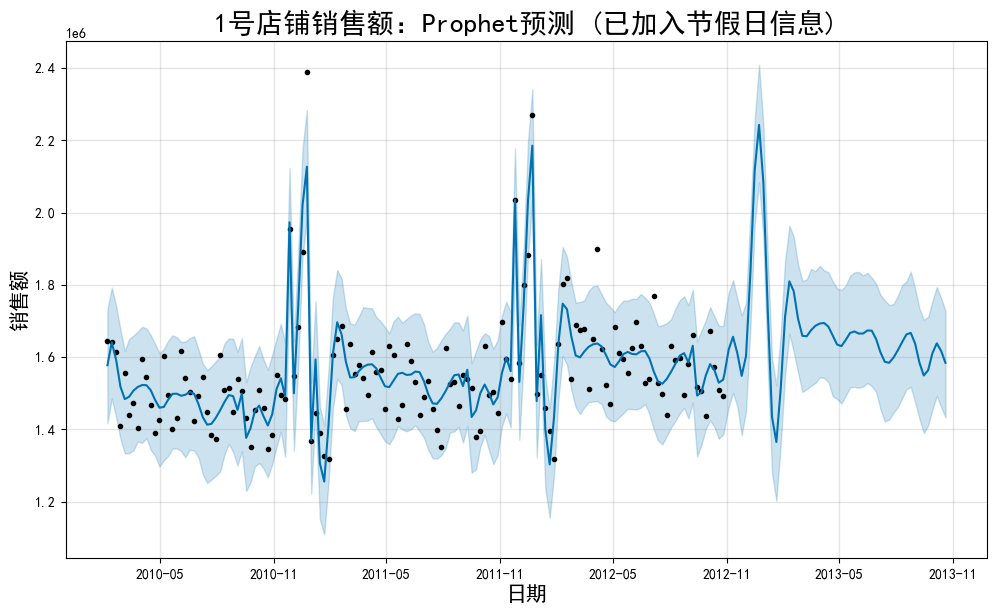

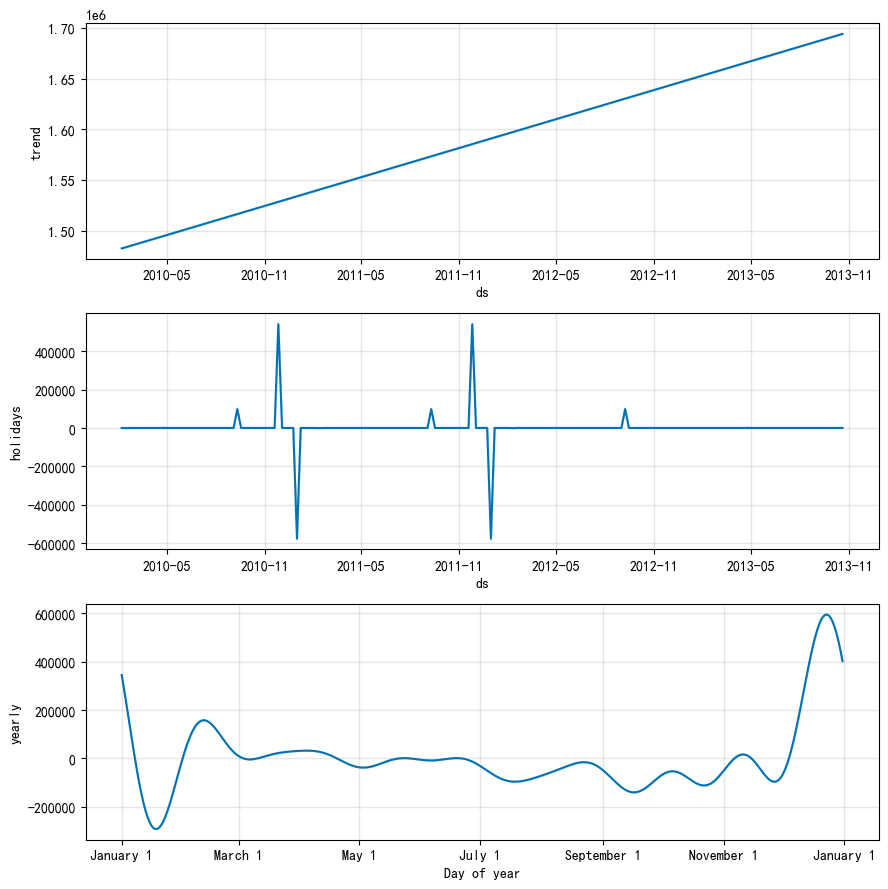

In [20]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
holidays_list = [
    {'holiday': 'SuperBowl', 'ds': '2010-02-12'},
    {'holiday': 'SuperBowl', 'ds': '2011-02-11'},
    {'holiday': 'SuperBowl', 'ds': '2012-02-10'},
    {'holiday': 'LaborDay', 'ds': '2010-09-10'},
    {'holiday': 'LaborDay', 'ds': '2011-09-09'},
    {'holiday': 'LaborDay', 'ds': '2012-09-07'},
    {'holiday': 'Thanksgiving', 'ds': '2010-11-26'},
    {'holiday': 'Thanksgiving', 'ds': '2011-11-25'},
    {'holiday': 'Christmas', 'ds': '2010-12-31'},
    {'holiday': 'Christmas', 'ds': '2011-12-30'},]
holidays_df = pd.DataFrame(holidays_list)
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])
print("--- 我们为Prophet创建的“节假日日历” ---")
print(holidays_df)
store1_sales = final_df_encoded[final_df_encoded['Store'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
store1_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)
model_prophet_with_holidays = Prophet(holidays=holidays_df, interval_width=0.95)
print("\n--- 正在训练装备了“节假日瞄准镜”的新模型... ---")
model_prophet_with_holidays.fit(store1_sales)
future = model_prophet_with_holidays.make_future_dataframe(periods=52, freq='W')
forecast_with_holidays = model_prophet_with_holidays.predict(future)
print("\n--- 正在绘制新模型的预测图... ---")
fig1 = model_prophet_with_holidays.plot(forecast_with_holidays)
plt.title('1号店铺销售额：Prophet预测 (已加入节假日信息)', fontsize=20)
plt.xlabel('日期', fontsize=15)
plt.ylabel('销售额', fontsize=15)
plt.show()
fig2 = model_prophet_with_holidays.plot_components(forecast_with_holidays)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
y_true = store1_sales['y'].values
prophet_pred_with_holidays = pd.merge(store1_sales, forecast_with_holidays[['ds','yhat']], on='ds', how='inner')['yhat'].values
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    print(f"--- {model_name} 模型评估分数 ---")
    print(f"RMSE (均方根误差): ${rmse:,.2f}")
    print(f"MAE (平均绝对误差): ${mae:,.2f}")
    print(f"MAPE (平均绝对百分比误差): {mape:.2f}%")
    print("-" * 30)
print("\n" + "="*10 + " 最终对决成绩单 " + "="*10)
calculate_metrics(y_true, prophet_pred_with_holidays, "Prophet (with Holidays)")
calculate_metrics(y_true[53:], sarimax_pred_in_sample[53:], "SARIMAX")
print("="*38)
    


========== 最终对决成绩单 ==========
--- Prophet (with Holidays) 模型评估分数 ---
RMSE (均方根误差): $79,415.11
MAE (平均绝对误差): $62,043.94
MAPE (平均绝对百分比误差): 3.98%
------------------------------
--- SARIMAX 模型评估分数 ---
RMSE (均方根误差): $78,057.87
MAE (平均绝对误差): $59,322.49
MAPE (平均绝对百分比误差): 3.73%
------------------------------


In [26]:
import pandas as pd
df_for_ml = final_df_encoded.copy()
print("--- 正在创造“时间戳特征”...")
df_for_ml['year'] = df_for_ml['Date'].dt.year
df_for_ml['month'] = df_for_ml['Date'].dt.month
df_for_ml['week_of_year'] = df_for_ml['Date'].dt.isocalendar().week.astype(int)
df_for_ml['day_of_week'] = df_for_ml['Date'].dt.dayofweek
print("--- 正在创造“滞后特征”...")
df_for_ml.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)
df_for_ml['sales_lag_1'] = df_for_ml.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df_for_ml['sales_lag_52'] = df_for_ml.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(52)
print("--- 正在创造“滚动特征”...")
df_for_ml['sales_rolling_mean_4'] = df_for_ml.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=4, min_periods=1).mean())
print("--- 正在进行最后的清理工作...")
df_for_ml.dropna(inplace=True)      
print("\n--- 特征工程完成后的最终数据预览 ---")
print(df_for_ml.head())      
print("\n--- 最终数据信息 ---")
df_for_ml.info()      

--- 正在创造“时间戳特征”...
--- 正在创造“滞后特征”...
--- 正在创造“滚动特征”...
--- 正在进行最后的清理工作...

--- 特征工程完成后的最终数据预览 ---
    Store  Dept       Date  Weekly_Sales  IsHoliday    Size  Temperature  \
52      1     1 2011-02-04      21665.76      False  151315        42.27   
53      1     1 2011-02-11      37887.17       True  151315        36.39   
54      1     1 2011-02-18      46845.87      False  151315        57.36   
55      1     1 2011-02-25      19363.83      False  151315        62.90   
56      1     1 2011-03-04      20327.61      False  151315        59.58   

    Fuel_Price  MarkDown1  MarkDown2  ...  Unemployment  Type_B  Type_C  year  \
52       2.989        0.0        0.0  ...         7.742   False   False  2011   
53       3.022        0.0        0.0  ...         7.742   False   False  2011   
54       3.045        0.0        0.0  ...         7.742   False   False  2011   
55       3.065        0.0        0.0  ...         7.742   False   False  2011   
56       3.288        0.0        0.0  ..

In [28]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y = df_for_ml['Weekly_Sales']
X = df_for_ml.drop(columns=['Weekly_Sales', 'Date'])
split_date = '2012-01-01'
train_indices = df_for_ml['Date'] < split_date
test_indices = df_for_ml['Date'] >= split_date
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]
print(f"--- 战场划分完毕 ---")
print(f"训练集大小: {len(X_train)} 条记录")
print(f"测试集大小: {len(X_test)} 条记录")
print("\n--- 正在训练LightGBM模型... ---")
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42)
lgb_model.fit(X_train, y_train)
print("\n--- 正在对测试集进行预测... ---")
y_pred = lgb_model.predict(X_test)
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    print(f"--- {model_name} 模型在“测试集”上的评估分数 ---")
    print(f"RMSE (均方根误差): ${rmse:,.2f}")
    print(f"MAE (平均绝对误差): ${mae:,.2f}")
    print(f"MAPE (平均绝对百分比误差): {mape:.2f}%")
    print("-" * 45)
calculate_metrics(y_test, y_pred, "LightGBM")
    
    


--- 战场划分完毕 ---
训练集大小: 135891 条记录
测试集大小: 124444 条记录

--- 正在训练LightGBM模型... ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3076
[LightGBM] [Info] Number of data points in the train set: 135891, number of used features: 20
[LightGBM] [Info] Start training from score 16781.479878

--- 正在对测试集进行预测... ---
--- LightGBM 模型在“测试集”上的评估分数 ---
RMSE (均方根误差): $3,360.24
MAE (平均绝对误差): $1,521.69
MAPE (平均绝对百分比误差): 155706275.36%
---------------------------------------------


In [29]:
results_df = X_test.copy()
results_df['Date'] = df_for_ml.loc[X_test.index, 'Date']
results_df['Actual_Sales'] = y_test.values
results_df['Predicted_Sales_LGBM'] = y_pred
final_columns = [
    'Date', 'Store', 'Dept', 'IsHoliday',
    'Actual_Sales', 'Predicted_Sales_LGBM',
    'Size', 'Type_B', 'Type_C', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']
results_df = results_df[final_columns]
viz_output_path ='C:/Users/Administrator/Desktop/沃尔玛项目/walmart_visualization_data.csv'
print(f"--- 正在将最终的可视化数据保存到以下路径 ---")
print(viz_output_path)
results_df.to_csv(viz_output_path, index=False)
print("\n--- 最终成果预览 ---")
print(results_df.head())
    

--- 正在将最终的可视化数据保存到以下路径 ---
C:/Users/Administrator/Desktop/沃尔玛项目/walmart_visualization_data.csv

--- 最终成果预览 ---
          Date  Store  Dept  IsHoliday  Actual_Sales  Predicted_Sales_LGBM  \
100 2012-01-06      1     1      False      16567.69          20849.631644   
101 2012-01-13      1     1      False      16894.40          16659.764686   
102 2012-01-20      1     1      False      18365.10          16591.201380   
103 2012-01-27      1     1      False      18378.16          17613.150726   
104 2012-02-03      1     1      False      23510.49          18719.780547   

       Size  Type_B  Type_C  Temperature  Fuel_Price         CPI  Unemployment  
100  151315   False   False        49.01       3.157  219.714258         7.348  
101  151315   False   False        48.53       3.261  219.892526         7.348  
102  151315   False   False        54.11       3.268  219.985689         7.348  
103  151315   False   False        54.26       3.290  220.078852         7.348  
104  151315   F